In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-stroke-dataset/brain_stroke.csv


# Data Overview

In [59]:
df = pd.read_csv("/kaggle/input/brain-stroke-dataset/brain_stroke.csv")

In [60]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [61]:
df.shape

(4981, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [6]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [8]:
df.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

# Data Visualization

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

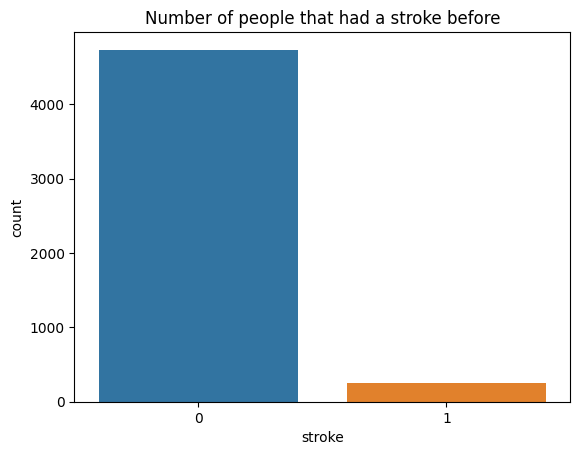

In [16]:
sns.countplot(x='stroke', data=df)
plt.title('Number of people that had a stroke before')
plt.show()

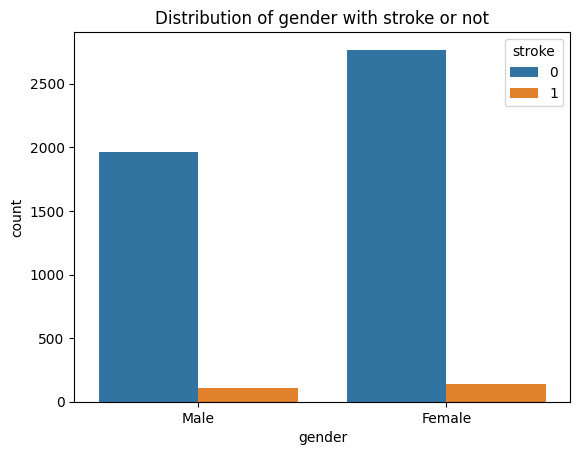

In [17]:
sns.countplot(x='gender', hue='stroke', data=df)
plt.title('Distribution of gender with stroke or not')
plt.show()

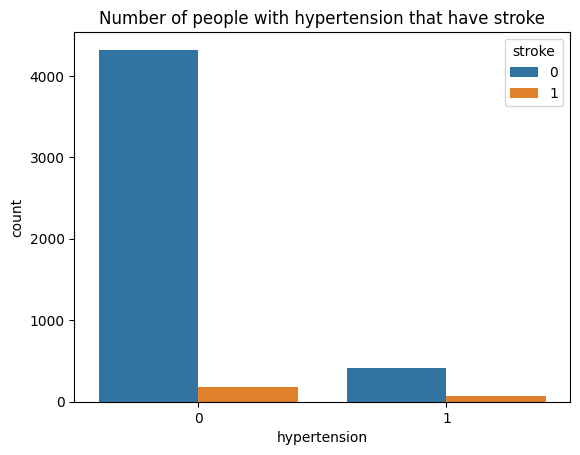

In [21]:
sns.countplot(x='hypertension', hue='stroke', data=df)
plt.title('Number of people with hypertension that have stroke')
plt.show()

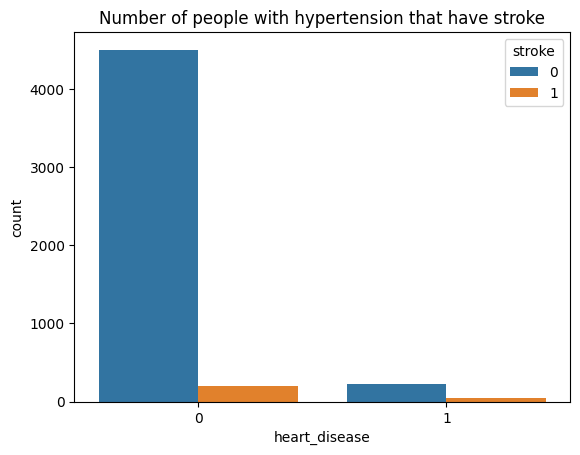

In [22]:
sns.countplot(x='heart_disease', hue='stroke', data=df)
plt.title('Number of people with hypertension that have stroke')
plt.show()

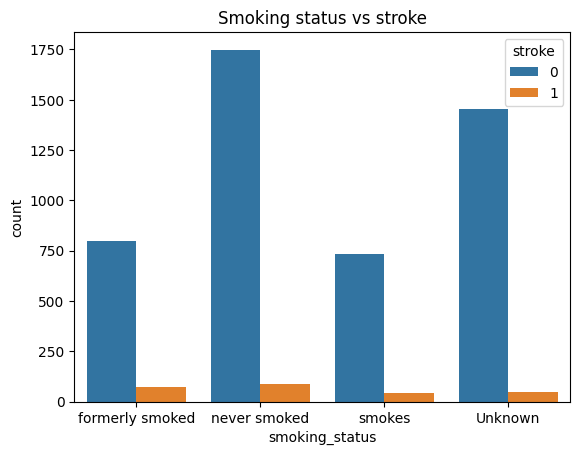

In [23]:
sns.countplot(x='smoking_status', hue='stroke', data=df)
plt.title('Smoking status vs stroke')
plt.show()

# Predictive Modelling

## Split data

In [ ]:
from sklearn.model_selection import train_test_split #training and testing data split

In [68]:
#replace categorical data into binary
df['gender'].replace(['Male', 'Female'],[0,1],inplace=True)
df['ever_married'].replace(['Yes', 'No'], [0,1],inplace=True)
df=pd.get_dummies(df,columns=['work_type','Residence_type','smoking_status'])

In [69]:
#define X and y
X = df.drop(['stroke'],axis=1)
y = df['stroke']
#split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

## Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
log_reg = LogisticRegression(random_state=42)

In [72]:
#fit train data into the model
log_reg.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [74]:
#predict y from test data
y_pred=log_reg.predict(X_test)

In [80]:
from sklearn import metrics #accuracy measure

In [81]:
#accuracy score
accuracy_score = metrics.accuracy_score(y_test,y_pred)
print("Accuracy score is: ", accuracy_score)

Accuracy score is:  0.9458375125376128
